<a href="https://colab.research.google.com/github/futurelider01/Hand-written-regression-algorithm/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

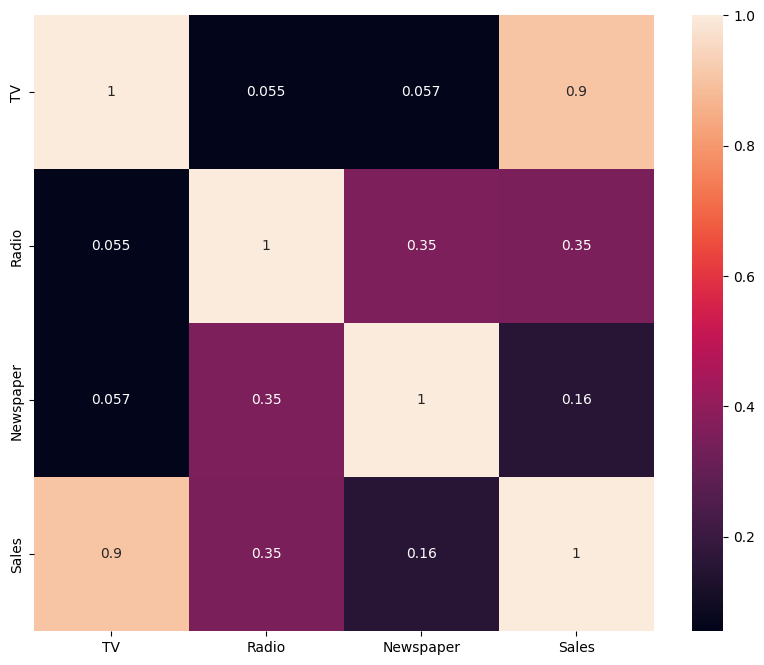

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

<Figure size 1000x800 with 0 Axes>

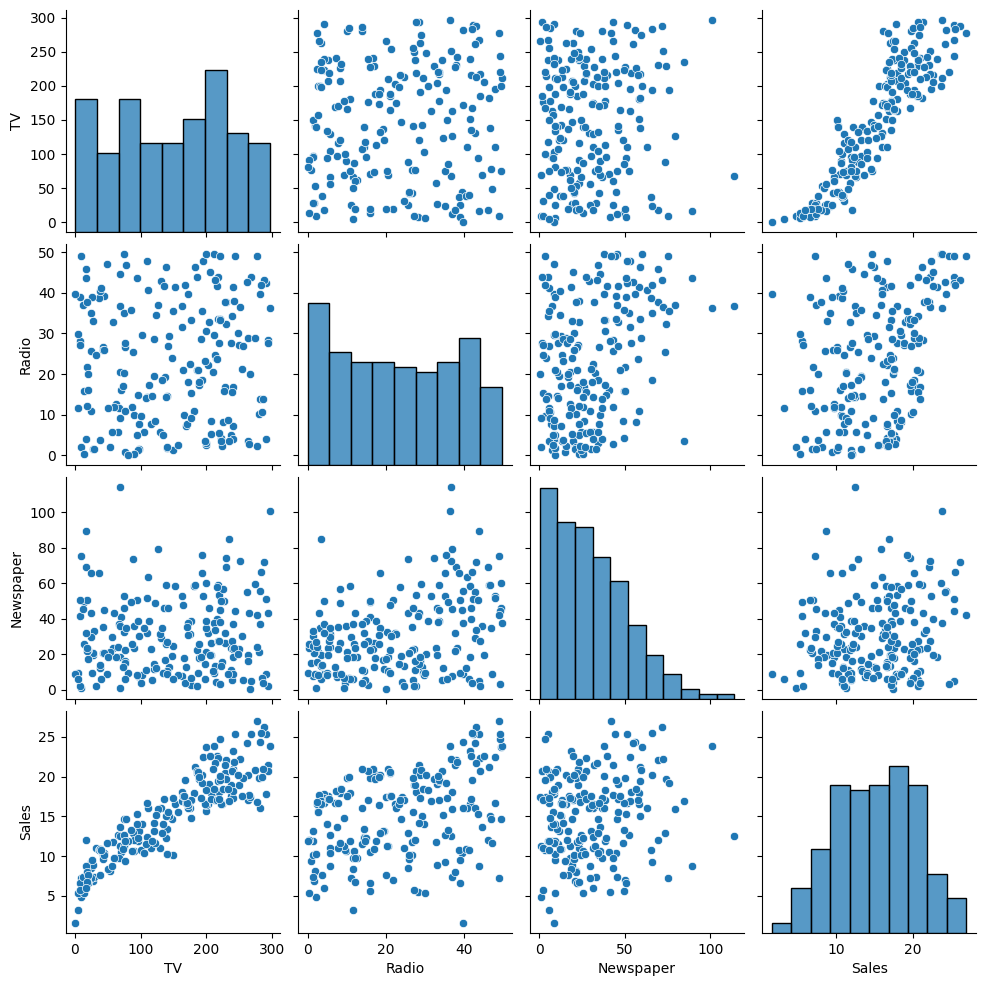

In [6]:
plt.figure(figsize=(10, 8))
sns.pairplot(df)

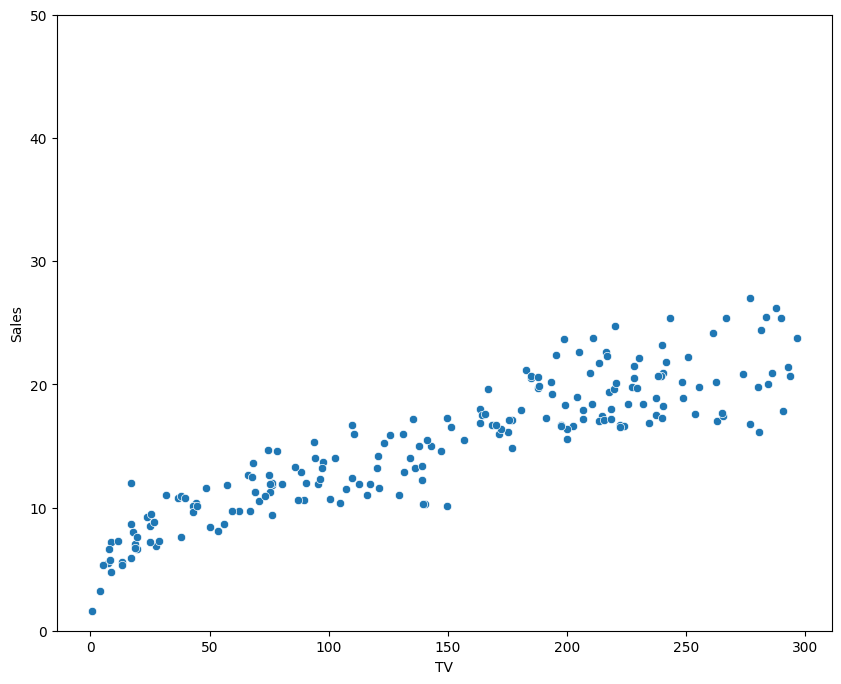

In [12]:
plt.figure(figsize=(10, 8))
plt.ylim(0, 50)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, random_state=42)

In [16]:
X_train = np.asanyarray(train[['TV']])
y_train = np.asanyarray(train[['Sales']])

In [17]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [22]:
theta1, theta0 = LR.coef_, LR.intercept_

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_test = np.asanyarray(test[['TV']])
y_test = np.asanyarray(test[['Sales']])

y_pred = LR.predict(X=X_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)**0.5
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 2.5103822386472214
MAE: 2.037955356968121


Text(0, 0.5, 'Sales')

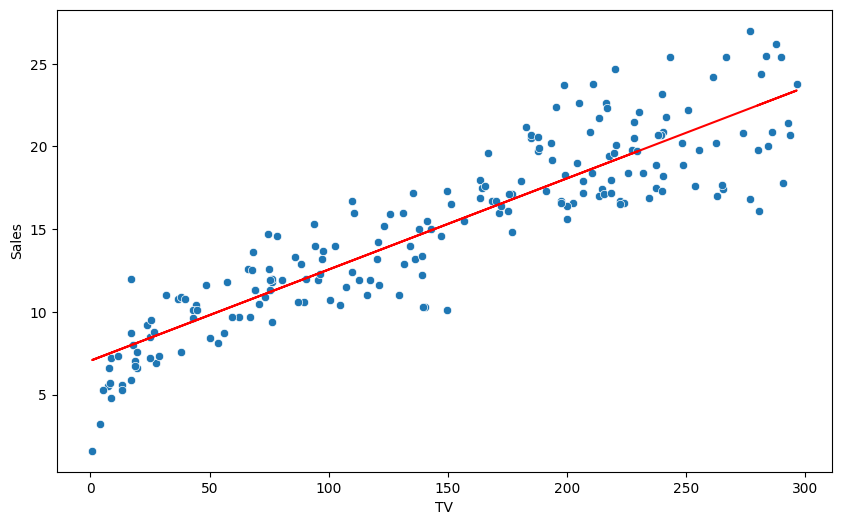

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.plot(X_train, theta1*X_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")